<a href="https://colab.research.google.com/github/Ulugbek9403/ml_edu/blob/master/notebooks/07_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas (Часть 2)

> 🚀 В этой практике нам понадобятся: `numpy==1.26.4, pandas==2.2.2`

> 🚀 Установить вы их можете с помощью команды: `%pip install numpy==1.26.4 pandas==2.2.2`


## Содержание

* [Условная индексация](#Условная-индексация)
  * [Задание - фильтруем](#Задание---фильтруем)
  * [Задание - еще фильтрации](#Задание---еще-фильтрации)
* [Операции с рядами / Новые колонки](#Операции-с-рядами-/-Новые-колонки)
* [Операции с фреймами](#Операции-с-фреймами)
  * [Переименование колонок / индексов](#Переименование-колонок-/-индексов)
    * [Задание - новые имена](#Задание---новые-имена)
  * [Удаление колонок / строк](#Удаление-колонок-/-строк)
  * [Определение количества NaN](#Определение-количества-NaN)
  * [Заполнение пустых значений](#Заполнение-пустых-значений)
  * [Информация об уникальных значениях](#Информация-об-уникальных-значениях)
  * [Фильтрация](#Фильтрация)
    * [Задание - и еще пофильтруем](#Задание---и-еще-пофильтруем)
  * [Сортировка](#Сортировка)
    * [Задание - снова сортируем](#Задание---снова-сортируем)
* [Разделение данных на категории](#Разделение-данных-на-категории)
  * [Задание - разделим по качеству](#Задание---разделим-по-качеству)
* [Агрегация данных](#Агрегация-данных)
  * [Задание - проще простого среднего](#Задание---проще-простого-среднего)
* [Группировки](#Группировки)
  * [Задание - сгруппируем](#Задание---сгруппируем)


В этом ноутбуке:
- Опять условная индексация?
- Как просто добавить новую колонку (x["name"] =) или убрать (.drop)
- Подробнее про Nan
- Уникальные значения (.unique)
- Фильтрация по значению (.filter)
- Сортировка (.sort_values)
- Категоризация (.cut)
- Очень важная "Группировка" (.groupby) - для операций с данными, объединенными по значениям ключевного столбца

In [2]:
import pandas as pd
import numpy as np

## Условная индексация

При работе с данными часто необходимо выбрать часть данных по условному признаку. По аналогии с работой в numpy, применение булевых операторов на ряд данных создаёт такой же по размеру ряд из булевых элементов, представляющих собой маску:

In [3]:
df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(15, 3)),
    columns=["x1", "x2", "x3"]
)
df.head(3)

,x1,x2,x3
0,8,6,3
1,9,8,2
2,0,8,4


In [4]:
df["x1"] > 5

,x1
0,True
1,True
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


После того, как маска получена, можно применить её, чтобы выбрать конкретные записи (строки) данных. При этом, индексация маской работает как при использовании `[]`, так и при использовании `.loc[]`.

In [6]:
mask = df["x1"] > 5
df[mask]

# Или df[df["x1"] > 5]

,x1,x2,x3
0,8,6,3
1,9,8,2
11,8,3,5
13,8,5,9


Чтобы получить значения, обратные условию, можно воспользоваться оператором НЕ: `~` - он инвертирует маску условия:

In [5]:
df[~(df["x1"] > 5)]

,x1,x2,x3
2,0,8,4
3,2,7,4
4,5,6,4
5,4,4,9
6,1,2,3
7,2,8,1
8,4,2,5
9,3,3,7
10,2,3,6
12,2,5,5


> Как и в numpy, для применения нескольких операций необходимо оборачивать каждую в скобки.

### Задание - фильтруем

Выберите записи во фрейме, которые по признаку `x1` имеют значение больше 3, а по признаку `x3` - меньше 8.

In [ ]:
df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(15, 3)),
    columns=["x1", "x2", "x3"]
)
df.head(3)

In [9]:
#  - отфильтровать фрейм по значениям признаков
import pandas as pd
import numpy as np

# Создаем DataFrame
df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(15, 3)),
    columns=["x1", "x2", "x3"]
)


print(df.head(3))


filtered_df = df[(df["x1"] > 3) & (df["x3"] < 8)]


   x1  x2  x3
0   4   0   6
1   6   3   0
2   8   7   3


In [8]:
# - отобразите только колонки x1 и x2 с учетом условий
#           (используйте .loc[])
import pandas as pd
import numpy as np

# Создаем DataFrame
df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(15, 3)),
    columns=["x1", "x2", "x3"]
)

print(df.head(3))
print(filtered_df.loc[:, ["x1", "x2"]])


   x1  x2  x3
0   5   8   7
1   5   1   7
2   5   8   7
    x1  x2
2    8   8
5    9   6
6    8   6
9    4   1
11   5   0
14   9   8


### Задание - еще фильтрации

С помощью метода `DataFrame.query()` получите записи, которые соответсвуют условию сравнения колонок $x1 > x3$:

In [ ]:
df = pd.DataFrame(
    [[1, 2, 6], [5, 1, 1], [8, 4, 6], [4, 1, 1], [9, 9, 0], [-1, 2, 1], [5, 5, 5]],
    columns = ["x1", "x2", "x3"]
)
df

In [12]:
# - Методом DataFrame.query() получить записи, удовлетворяющие условию
#           x1 > x3

import pandas as pd


f = pd.DataFrame(
    [[1, 2, 6], [5, 1, 1], [8, 4, 6], [4, 1, 1], [9, 9, 0], [-1, 2, 1], [5, 5, 5]],
    columns = ["x1", "x2", "x3"]
)

filtered_df_query = f.query("x1 > x3")
print(filtered_df_query)


   x1  x2  x3
1   5   1   1
2   8   4   6
3   4   1   1
4   9   9   0


In [11]:
#  - Сделать аналогичное действие, но уже с помощью условной индексации
import pandas as pd

# Создаем DataFrame
f = pd.DataFrame(
    [[1, 2, 6], [5, 1, 1], [8, 4, 6], [4, 1, 1], [9, 9, 0], [-1, 2, 1], [5, 5, 5]],
    columns = ["x1", "x2", "x3"]
)


filtered_df_conditional = f[f["x1"] > f["x3"]]
print(filtered_df_conditional)


   x1  x2  x3
1   5   1   1
2   8   4   6
3   4   1   1
4   9   9   0


## Операции с рядами / Новые колонки

Работа с фреймами и рядами данных в pandas поддерживает многие операции по аналогии с работой в numpy.

In [13]:
df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(15, 3)),
    columns=["x1", "x2", "x3"]
)
df.head(3)

,x1,x2,x3
0,2,4,4
1,0,3,4
2,8,8,4


In [14]:
# Создать новую колонку можно по аналогии с новым ключём в словаре
# Сложение нескольких Series и запись в новую колонку
df["x1+x2"] = df["x1"] + df["x2"]
df.head(3)

,x1,x2,x3,x1+x2
0,2,4,4,6
1,0,3,4,3
2,8,8,4,16


In [15]:
# Поэлементное умножение
df["x1*x3"] = df["x1"] * df["x3"]
df.head(3)

,x1,x2,x3,x1+x2,x1*x3
0,2,4,4,6,8
1,0,3,4,3,0
2,8,8,4,16,32


In [16]:
# Взятие среднего по колонке (метод Series.mean())
df["x1"].mean()

4.533333333333333

In [17]:
# Использование функций numpy для работы с колонками
df["x2_exp"] = np.exp(df["x2"])
df.head(3)

,x1,x2,x3,x1+x2,x1*x3,x2_exp
0,2,4,4,6,8,54.598150
1,0,3,4,3,0,20.085537
2,8,8,4,16,32,2980.957987


Как вы заметили, ряды (это же одномерные массивы) можно обрабатывать:
- операциями Python;
- методами класса Series;
- функциями numpy.

> Для создания новой колонки достаточно просто задать имя новой колонки и записать ряд данных (может быть даже одномерным массивом numpy), который имеет такой же размер, куда пишется.

Для случая, если нужной функции нет, то можно создать свою с помощью метода `Series.apply()`, которой передаётся название функции для применения над всем рядом.

In [18]:
df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(3, 3)),
    columns=["x1", "x2", "x3"]
)
df

,x1,x2,x3
0,2,0,6
1,7,4,1
2,2,2,3


In [19]:
# Обязательно требование к функции - один аргумент
# Эта функция будет передана в apply() и pandas
#   будет вызывать ее и передавать в нее
#   по одному элементу из ряда
# Возвращать функция должна результат операции над элементом
def my_func(x):
    print(type(x))
    print(x)
    return x*2

df["result"] = df["x1"].apply(my_func)
df

<class 'int'>
2
<class 'int'>
7
<class 'int'>
2


,x1,x2,x3,result
0,2,0,6,4
1,7,4,1,14
2,2,2,3,4


Как видно, в функцию передается каждый элемент в ряду, тип элемента соответсвует типу колонки. Результат метода `.apply()` - новый ряд с примененной функцией.

## Операции с фреймами

### Переименование колонок / индексов

Одной из полезных функций является возможность переименования имён колонок. Для этого имеется метод `DataFrame.rename()`:

In [20]:
df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(15, 3)),
    columns=["x1", "x2", "x3"]
)
df.head(3)

,x1,x2,x3
0,8,6,4
1,3,3,2
2,0,4,9


In [21]:
# Методу передается в аргумент columns словарь,
#   в котором ключи - имена колонок,
#   значения - новые имена для переименования
df.rename(
    columns={
        "x1": "new_name_for_x1",
        "x3": "that_not_x3"
    },
    inplace=True
)
df.head(3)

,new_name_for_x1,x2,that_not_x3
0,8,6,4
1,3,3,2
2,0,4,9


> Аргумент `inplace` является достаточно распространённым в методах фреймов. Этот аргумент управляет тем, как произвести операцию: прямо в этом объекте (при установленном True) или вернуть результатом новый фрейм с произведенной операцией (при установленном False).

Для сравнения аналогичный код без `inplace` выглядел бы так:
```python
df_renamed = df.rename(columns={
    "x1": "new_name_for_x1",
    "x3": "that_not_x3"
})
df_renamed
```

Для переименования индексов (названий записей) используется тот же принцип, но словарь передаётся в аргумент `index` с ключами - исходными названиями индексов, значениями - новыми значениями.

#### Задание - новые имена

Переименуйте индексы и колонки во фрейме

In [ ]:
df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(5, 3)),
    index=["A", "B", "C", "D", "E"],
    columns=["x1", "x2", "x3"]
)
df

In [22]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(5, 3)),
    index=["A", "B", "C", "D", "E"],
    columns=["x1", "x2", "x3"]
)

print(df)

df.rename(index={"A": "indA", "C": "indC"},
          columns={"x1": "new1", "x3": "new3"},
          inplace=True)

print(df)


   x1  x2  x3
A   3   5   0
B   5   5   1
C   4   7   5
D   1   6   3
E   8   2   6
      new1  x2  new3
indA     3   5     0
B        5   5     1
indC     4   7     5
D        1   6     3
E        8   2     6


### Удаление колонок / строк

Данную операцию можно произвести двумя способами:

1. Выбрать колонки, которые необходимо оставить, простой индексацией;

2. Метод `DataFrame.drop()`.

In [27]:
df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(15, 3)),
    columns=["x1", "x2", "x3"]
)
df.head(3)

,x1,x2,x3
0,6,9,3
1,7,3,4
2,6,5,7


In [28]:
df.drop(columns=["x2"], inplace=True)
df.head(3)

,x1,x3
0,6,3
1,7,4
2,6,7


### Определение количества NaN

В данных часто бывают пропуски (NaN), при этом на первых этапах анализа важно понять их количество по каждому признаку. Для этого можно воспользоваться методом `DataFrame.isna()`, который создаст двумерный булевый фрейм, отвечающий на вопрос "является ли значение NaN?". После этого над всем фреймом можно применить метод `DataFrame.sum()`, который вернет ряд (Series) с количеством элементов True в булевом фрейме (элементов NaN в основном фрейме).

Кодировка "пустых значений" в исходном файле обычно показывается либо константой с неподходящим значением (например -1 для возраста), либо пропуском.

In [29]:
df = pd.DataFrame(
    data=np.random.randint(0, 10, size=(5, 3)),
    columns=["x1", "x2", "x3"]
)
df.iloc[0, :2] = np.nan
df.iloc[2, 1:] = np.nan

df

,x1,x2,x3
0,NaN,NaN,9.0
1,2.0,8.0,4.0
2,1.0,NaN,NaN
3,8.0,7.0,7.0
4,5.0,3.0,4.0


In [30]:
df.isna()

,x1,x2,x3
0,True,True,False
1,False,False,False
2,False,True,True
3,False,False,False
4,False,False,False


In [31]:
df.isna().sum()

,0
x1,1
x2,2
x3,1


### Заполнение пустых значений

Техники заполнения пустых значений имеют разнообразное представление, но одним из простых методов является заполнение константой. Для этого ряд данных имеет метод `Series.fillna()`, в который можно передать значение и вместо NaN элементов будет поставлена константа, указанная в аргументах.

In [32]:
df

,x1,x2,x3
0,NaN,NaN,9.0
1,2.0,8.0,4.0
2,1.0,NaN,NaN
3,8.0,7.0,7.0
4,5.0,3.0,4.0


In [33]:
df["x2"].fillna(3, inplace=True)
df

<ipython-input-33-b225b708f747>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["x2"].fillna(3, inplace=True)


,x1,x2,x3
0,NaN,3.0,9.0
1,2.0,8.0,4.0
2,1.0,3.0,NaN
3,8.0,7.0,7.0
4,5.0,3.0,4.0


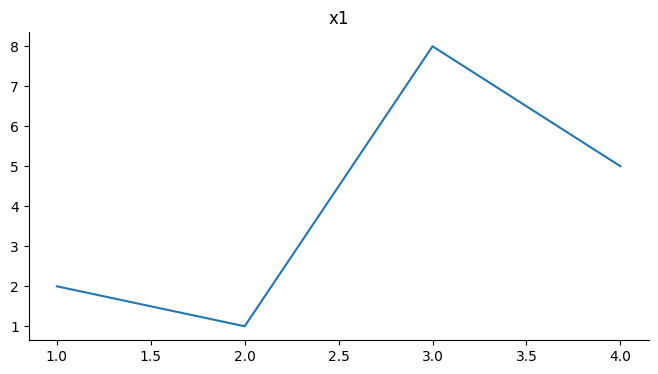

In [34]:
# @title x1

from matplotlib import pyplot as plt
df['x1'].plot(kind='line', figsize=(8, 4), title='x1')
plt.gca().spines[['top', 'right']].set_visible(False)

### Информация об уникальных значениях

При работе с категориальными данными полезна информация об уникальных значениях признака, поэтому важно понимать, как проверить их количество:

In [35]:
df = pd.DataFrame({
    "col1": ["high", "high", "low", "med", "low", "low", "med", "low", "low", "high"],
    "col2": [0, 1, 1, 2, 3, 1, 1, 2, 2, 2]
})
df

,col1,col2
0,high,0
1,high,1
2,low,1
3,med,2
4,low,3
5,low,1
6,med,1
7,low,2
8,low,2
9,high,2


In [36]:
# Метод DataFrame.nunique() позволяет вывести
#   количество уникальных значений в каждой колонке
# Результат - Series с индексами - названиями колонок
df.nunique()

,0
col1,3
col2,4


In [ ]:
# Метод Series.value_counts() показывает уникальные значения в ряду
#   и указывает их количество
df["col1"].value_counts()

In [37]:
# Результат - Series с индексами - уникальными значениями
df["col2"].value_counts()

,count
col2,
1,4
2,4
0,1
3,1


### Фильтрация

Метод `DataFrame.filter()` позволяет отфильтровать и выбрать только те колонки/записи, котрые соответствуют условию, заданному в аргументах:

In [38]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),
                  index=["mouse", "rabbit"],
                  columns=["col_one", "col_two", "col_three"])
df

,col_one,col_two,col_three
mouse,1,2,3
rabbit,4,5,6


In [39]:
# Отфильтровать по именам колонок
# Аналогично df[["col_one", "col_three"]]
df.filter(items=["col_one", "col_three"], axis="columns")

,col_one,col_three
mouse,1,3
rabbit,4,6


In [43]:
# Отфильтровать по регулярному выражению
# Оставить только те колонки, которые оканчиваются на букву "o"
df.filter(regex="o$", axis="columns")

""
dog in house
cat in house
pig in farm


#### Задание - и еще пофильтруем

Отфильруйте записи по строке, содержащейся в имени индекса (аргумент `like`):

In [44]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6], [7, 8, 9])),
                  index=["dog in house", "cat in house", "pig in farm"],
                  columns=["x1", "x2", "x3"])
df

,x1,x2,x3
dog in house,1,2,3
cat in house,4,5,6
pig in farm,7,8,9


In [42]:
import pandas as pd
import numpy as np

f = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6], [7, 8, 9])),
                  index=["dog in house", "cat in house", "pig in farm"],
                  columns=["x1", "x2", "x3"])

print(f)

filtered_df = f[f.index.str.contains("house")]
print(filtered_df)


              x1  x2  x3
dog in house   1   2   3
cat in house   4   5   6
pig in farm    7   8   9
              x1  x2  x3
dog in house   1   2   3
cat in house   4   5   6


### Сортировка

Всегда полезно знать, как отсортировать данные, для этого мы воспользуемся методом `DataFrame.sort_values()`:

In [45]:
df = pd.DataFrame({
    "col1": ["A", "A", "B", np.nan, "D", "C"],
    "col2": [2, 1, 9, 8, 7, 4],
    "col3": [0, 1, 9, 4, 2, 3],
    "col4": ["a", "B", "c", "D", "e", "F"]
}, index=["A", "B", "C", "D", "E", "F"])
df

,col1,col2,col3,col4
A,A,2,0,a
B,A,1,1,B
C,B,9,9,c
D,NaN,8,4,D
E,D,7,2,e
F,C,4,3,F


In [49]:
# Отсортируем записи колонки col2
# Именно поэтому в axis ставится rows, так как
#   операция производится в колонке по каждому ряду
df.sort_values(by="col2", axis="rows")

,col1,col2,col3,col4,col5
1,0,1,3,4,7
4,6,10,0,17,10
2,11,11,3,3,1
0,4,13,19,14,16
3,3,16,17,12,15


#### Задание - снова сортируем

Отсортируйте данные:

In [ ]:
df = pd.DataFrame(
    np.random.randint(0, 20, size=(5, 5)),
    columns=["col1", "col2", "col3", "col4", "col5"]
)
df

In [48]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    np.random.randint(0, 20, size=(5, 5)),
    columns=["col1", "col2", "col3", "col4", "col5"]
)

print(df)

df_sorted = df.sort_values(by="col3", ascending=False)
print(df_sorted)



   col1  col2  col3  col4  col5
0     4    13    19    14    16
1     0     1     3     4     7
2    11    11     3     3     1
3     3    16    17    12    15
4     6    10     0    17    10
   col1  col2  col3  col4  col5
0     4    13    19    14    16
3     3    16    17    12    15
1     0     1     3     4     7
2    11    11     3     3     1
4     6    10     0    17    10


## Разделение данных на категории

В ходе работы с данными часто бывает необходимо диапазон числовой переменной разбить на несколько групп (категорий). Например, заменить числовой диапазон температур воды $[-10; 60]$ на три категории $[низкая, средняя, высокая]$. Для таких целей используется функция `pd.cut()`:

In [64]:
df = pd.DataFrame({
    "temp": [59, 22, -10, 38, 20, 40, 38, 47, 20, 15, 13, 44, 57, 32, 38]
})
df.head()

,temp
0,59
1,22
2,-10
3,38
4,20


In [65]:
# Можно задать свои границы диапазона и названия категорий
# Если планируется три категории, то границ должно быть на одну больше -
#   так задаются диапазоны для категорий
df["temp_cat"] = pd.cut(
    x=df["temp"],
    bins=[-10, 10, 25, 60],
    labels=["low", "medium", "high"],
    # Флаг, чтобы самое левое значение границы входило в первый диапазон
    include_lowest=True
)
df.head()

,temp,temp_cat
0,59,high
1,22,medium
2,-10,low
3,38,high
4,20,medium


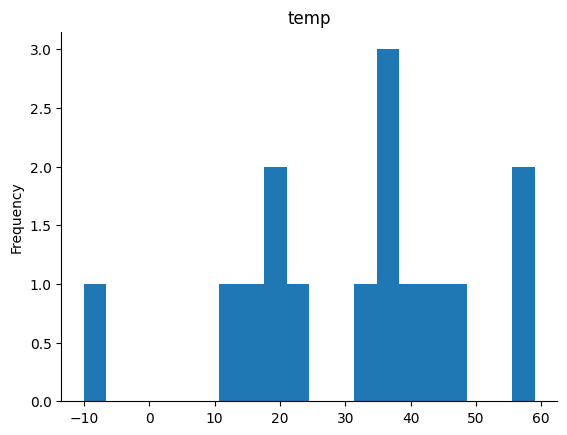

In [66]:
# @title temp

from matplotlib import pyplot as plt
df['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [67]:
# Результат разделения имеет категориальный тип
df["temp_cat"].dtype

CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True, categories_dtype=object)

In [68]:
# Можно не задавать имена категориям, тогда он сам их назовёт
result_after_cut = pd.cut(
    x=df["temp"],
    bins=[-10, 10, 25, 60],
    include_lowest=True
)
# Взглянем на имена
result_after_cut.unique()

[(25.0, 60.0], (10.0, 25.0], (-10.001, 10.0]]
Categories (3, interval[float64, right]): [(-10.001, 10.0] < (10.0, 25.0] < (25.0, 60.0]]

In [69]:
# Можно не задавать границы, лишь количество категорий -
#   разделение будет на категории с одинаковой шириной диапазонов
result_after_cut = pd.cut(
    x=df["temp"],
    bins=3
)
result_after_cut.unique()

[(36.0, 59.0], (13.0, 36.0], (-10.069, 13.0]]
Categories (3, interval[float64, right]): [(-10.069, 13.0] < (13.0, 36.0] < (36.0, 59.0]]

### Задание - разделим по качеству

Разделите показатель качества в диапазоне $[0, 100]$ на четыре группы:

* плохое $[0-20]$,

* среднее $(20-45]$,

* хорошее $(45-85]$,

* отличное $(85-100]$.

Выясните, что происходит со значениями, которые не попадают в диапазоны категорий:

In [70]:
df = pd.DataFrame({
    "quality": [ 7, 67, 21, 38,  2, -2, 79, 22,  5, 31, 77, 72, 23, 64, 99]
})
df.head()

,quality
0,7
1,67
2,21
3,38
4,2


In [71]:
import pandas as pd

df = pd.DataFrame({
    "quality": [ 7, 67, 21, 38, 2, -2, 79, 22, 5, 31, 77, 72, 23, 64, 99]
})

print(df.head())

df['category'] = pd.cut(df['quality'], bins=[0, 20, 45, 85, 100],
                       labels=['плохое', 'среднее', 'хорошее', 'отличное'],
                       include_lowest=True)
print(df)

print(df[df['category'].isna()])




   quality
0        7
1       67
2       21
3       38
4        2
    quality  category
0         7    плохое
1        67   хорошее
2        21   среднее
3        38   среднее
4         2    плохое
5        -2       NaN
6        79   хорошее
7        22   среднее
8         5    плохое
9        31   среднее
10       77   хорошее
11       72   хорошее
12       23   среднее
13       64   хорошее
14       99  отличное
   quality category
5       -2      NaN


## Агрегация данных

Агрегация данных - объединение группы данных для получения информации. Примерами операций аргегации являются: сумма, среднее, максимум, минимум.

В pandas агрегация может быть выполнена путем метода `DataFrame.aggregate()`:

In [72]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=["A", "B", "C"])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [73]:
# Получим значения минимумов и средних по всем колонкам
# Принцип аналогичен операциям в numpy -
#   для агрегации по колонка операция должна пройти по рядам,
#   соответсвенно, axis="rows"
df.aggregate(["min", "mean"], axis="rows")

,A,B,C
min,1.0,2.0,3.0
mean,4.0,5.0,6.0


In [74]:
# Зададим правила агрегации для каждой колонки
df.aggregate({
    "A": ["sum", "min"],
    "B": ["max", "min"],
    "C": ["sum", "mean"],
})

,A,B,C
sum,12.0,NaN,18.0
min,1.0,2.0,NaN
max,NaN,8.0,NaN
mean,NaN,NaN,6.0


### Задание - проще простого среднего

Произведите агрегацию средним по рядам

In [ ]:
df = pd.DataFrame(
    ([1, 2, 3], [4, 5, 6], [7, 8, 9]),
    columns=["x1", "x2", "x3"])
df

In [75]:
import pandas as pd

df = pd.DataFrame(
    ([1, 2, 3], [4, 5, 6], [7, 8, 9]),
    columns=["x1", "x2", "x3"])

print(df)

mean_values = df.mean(axis=1)
print(mean_values)


   x1  x2  x3
0   1   2   3
1   4   5   6
2   7   8   9
0    2.0
1    5.0
2    8.0
dtype: float64


## Группировки

Игры закончились - начались серьёзные вещи. Группировки это один из сильнейших инструментов, которые позволяют вытаскивать из данных полезную информацию!

Для понимания разберём пример: допустим, у нас есть база данных студентов с 1 по 4 курсы. Одна из колонок будет иметь в качестве значения номер курса и так как количество допустимых значений ограничено - то правильно считать эту колонку категориальной. Другая колонка - оценка за общий университетский тест (все курсы его проходили). Третьей колонкой будет время выполнения:

In [76]:
data = [
    [1, 4.7, 60],
    [3, 4.5, 45],
    [4, 4.8, 40],
    [1, 4.9, 58],
    [2, 4.1, 50],
    [2, 4.2, 49],
    [2, 4.4, 49],
    [3, 4.9, 46],
    [4, 4.3, 33],
]

stud_df = pd.DataFrame(data, columns=["Grade", "Test_Mark", "Time"])
stud_df

,Grade,Test_Mark,Time
0,1,4.7,60
1,3,4.5,45
2,4,4.8,40
3,1,4.9,58
4,2,4.1,50
5,2,4.2,49
6,2,4.4,49
7,3,4.9,46
8,4,4.3,33


Теперь представим, что мы сложим каждый курс в свою корзинку путем группировки:


In [77]:
gr_stud_df = stud_df.groupby(by="Grade")

# Тип результата - pd.DataFrameGroupBy
print(type(gr_stud_df))

# Таким образом увидим словарь:
#   Ключи - названия групп
#   Значения - индексы из данных для группы
gr_stud_df.groups

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


{1: [0, 3], 2: [4, 5, 6], 3: [1, 7], 4: [2, 8]}

После того, как мы сложили записи по группам, мы можем вычислить, например, среднее значение в каждой группе:

In [78]:
gr_stud_df.agg("mean")

,Test_Mark,Time
Grade,,
1,4.800000,59.000000
2,4.233333,49.333333
3,4.700000,45.500000
4,4.550000,36.500000


В результате, мы смогли вычислить среднюю оценку за тест по каждому курсу! И для этого нам потребовалось всего два метода! Ручным вариантом нам бы пришлось создавать контейнеры, складывать в них значения и потом вычислять средние значения...

Резюмируя, группировка - это размещение данных по группам уникальных значений признака, по которому группируется. После группировки можно произвести агрегацию данных в каждой группе.

In [79]:
# Более сложный вариант - найдем средние и минимальные время и оценку

gr_stud_df.agg(["mean", "min"])

Test_Mark            Time    
           mean  min       mean min
Grade                              
1      4.800000  4.7  59.000000  58
2      4.233333  4.1  49.333333  49
3      4.700000  4.5  45.500000  45
4      4.550000  4.3  36.500000  33

In [80]:
# Или зададим правила для каждого признака по отдельности

res = gr_stud_df.agg({
    "Test_Mark": ["mean", "min"],
    "Time": ["min"]
})

print(type(res))
res

<class 'pandas.core.frame.DataFrame'>


Test_Mark      Time
           mean  min  min
Grade                    
1      4.800000  4.7   58
2      4.233333  4.1   49
3      4.700000  4.5   45
4      4.550000  4.3   33

In [81]:
# Для обращения к данным просто используем несколько индексов,
#   так как это DataFrame
res["Test_Mark"]["mean"]

,mean
Grade,
1,4.800000
2,4.233333
3,4.700000
4,4.550000


### Задание - сгруппируем

Сгруппируйте данные по признаку x2 и найдите медиану и максимальное значения по признакам x1, x3:

In [ ]:
df = pd.DataFrame({
    "x1": np.random.randint(10, 100, size=(200, )),
    "x2": np.random.choice(["low", "high", "medium"], size=(200, )),
    "x3": np.random.randint(-20, 30, size=(200, )),
})
df.head()

In [82]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "x1": np.random.randint(10, 100, size=(200, )),
    "x2": np.random.choice(["low", "high", "medium"], size=(200, )),
    "x3": np.random.randint(-20, 30, size=(200, )),
})

print(df.head())

grouped = df.groupby("x2")
result = grouped.agg({"x1": ["median", "max"], "x3": ["median", "max"]})
print(result)


   x1      x2  x3
0  12     low  18
1  91     low -20
2  30  medium -11
3  21  medium  23
4  48  medium  16
           x1         x3    
       median max median max
x2                          
high     54.0  98    3.5  27
low      58.0  99    2.0  29
medium   60.0  99    2.0  29
